# SimpleRNN en action

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [4]:
N = 1000    
Tp = 800    

In [5]:
t=np.arange(0,N)
x=np.sin(0.02*t)+2*np.random.rand(N)
df = pd.DataFrame(x)
df.head()

,0
0,1.346814
1,0.809545
2,1.175207
3,1.744750
4,2.063565


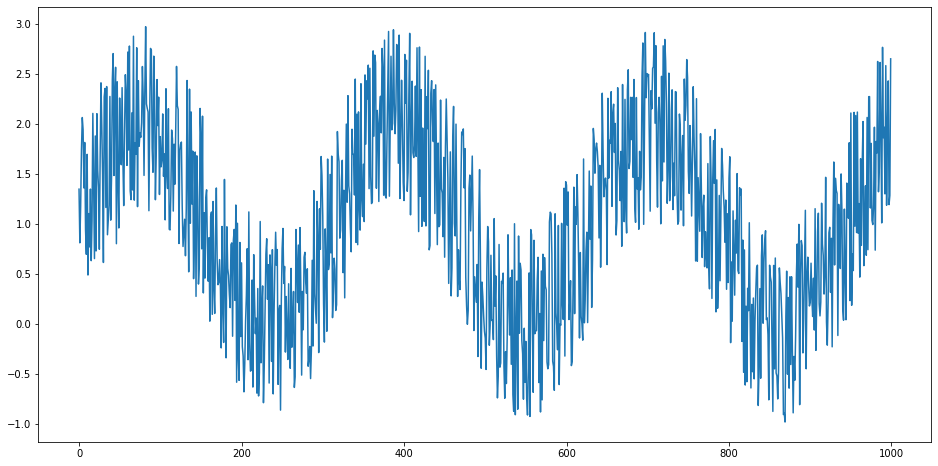

In [7]:
plt.figure(figsize=(16, 8))
plt.plot(df)
plt.show() 

In [8]:
values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]

In [9]:
step = 4
# add step elements into train and test
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))

In [11]:
def convertToMatrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d=i+step  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)

trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)

In [12]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape

(800, 1, 4)

In [13]:
# SimpleRNN model
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                1184      
_________________________________________________________________
dense (Dense)                (None, 8)                 264       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

Epoch 1/100
50/50 - 1s - loss: 1.6726
Epoch 2/100
50/50 - 0s - loss: 0.5337
Epoch 3/100
50/50 - 0s - loss: 0.4124
Epoch 4/100
50/50 - 0s - loss: 0.4085
Epoch 5/100
50/50 - 0s - loss: 0.4027
Epoch 6/100
50/50 - 0s - loss: 0.4008
Epoch 7/100
50/50 - 0s - loss: 0.3978
Epoch 8/100
50/50 - 0s - loss: 0.3962
Epoch 9/100
50/50 - 0s - loss: 0.3951
Epoch 10/100
50/50 - 0s - loss: 0.3948
Epoch 11/100
50/50 - 0s - loss: 0.3940
Epoch 12/100
50/50 - 0s - loss: 0.3936
Epoch 13/100
50/50 - 0s - loss: 0.3895
Epoch 14/100
50/50 - 0s - loss: 0.3908
Epoch 15/100
50/50 - 0s - loss: 0.3915
Epoch 16/100
50/50 - 0s - loss: 0.3898
Epoch 17/100
50/50 - 0s - loss: 0.3896
Epoch 18/100
50/50 - 0s - loss: 0.3887
Epoch 19/100
50/50 - 0s - loss: 0.3875
Epoch 20/100
50/50 - 0s - loss: 0.3870
Epoch 21/100
50/50 - 0s - loss: 0.3876
Epoch 22/100
50/50 - 0s - loss: 0.3864
Epoch 23/100
50/50 - 0s - loss: 0.3848
Epoch 24/100
50/50 - 0s - loss: 0.3838
Epoch 25/100
50/50 - 0s - loss: 0.3848
Epoch 26/100
50/50 - 0s - loss: 0.

In [21]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore) 

0.35646408796310425


In [23]:
predicted.shape

(1000, 1)

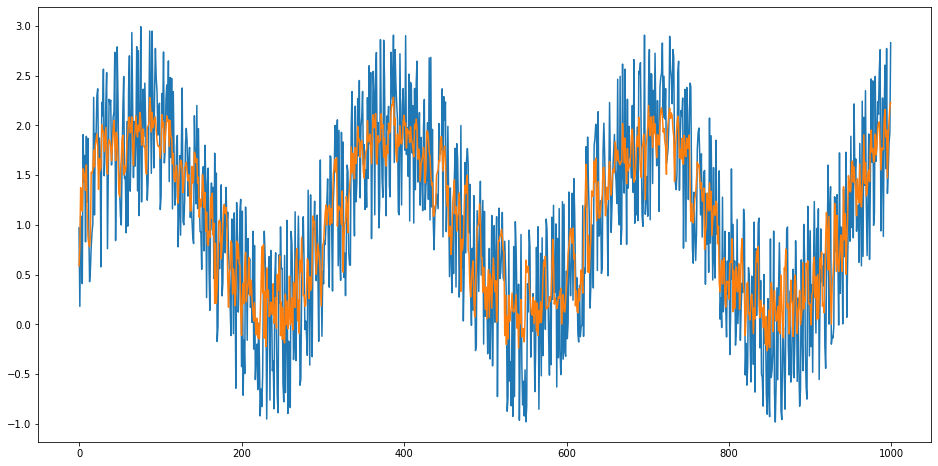

In [28]:
plt.figure(figsize=(16, 8))
index = df.index.values
plt.plot(df)
plt.plot(index,predicted)
#plt.axvline(df.index[Tp], c="r")
plt.show() 